In [1]:
from astropy.table import Table
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

import numpy as np
from numpy import pi

In [2]:
def sky_dist_plot(tab, fig_name):

    # Transform the coordinate into an astropy.coordinate.SkyCoord object
    coord = SkyCoord(ra=tab["ra"], dec=tab["dec"])

    # The mid-point of skyplot will be 0
    ra_rad = coord.ra.wrap_at(180 * u.deg).radian
    dec_rad = coord.dec.radian

    # Plot the formal error distribution of opa and Gaia DR2
    fig = plt.figure(figsize=(8, 4))
    ax = plt.subplot(111, projection="aitoff")

    # Source distribution
    sc = ax.scatter(ra_rad, dec_rad, marker="o", 
                    s=10, color="none", edgecolors="b")

    ax.set_xticks(np.arange(-5./6 * pi, pi, pi/6))
    ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h",
                        "0h", "2h", "4h", "6h", "8h", "10h"])

    ax.grid()
    plt.savefig(fig_name, hbox="tight")

In [3]:
apm_tab = Table.read("../results/new_candidate4.apm", format="ascii",
              names=["iers_name", "pm", "pmra", "pmdec", 
                     "pm_err", "pmra_err", "pmdec_err",
                    "ra", "dec", "x1", "x2"])

nu = apm_tab["pm"] / apm_tab["pm_err"]
apm_tab.add_column(nu, name="nu")
apm_tab.sort("nu")

apm_tab["ra"].unit = u.deg
apm_tab["dec"].unit = u.deg

In [4]:
# 1st Zone, dec < -30 deg 
mask1 = (apm_tab["dec"] <= -30*u.deg)
apm_tab1 = apm_tab[mask1]
apm_tab1.sort("nu")

# 2nd Zone, -30 deg < dec < 0 deg
mask2 = ((apm_tab["dec"] > -30*u.deg) & (apm_tab["dec"] < 0*u.deg))
apm_tab2 = apm_tab[mask2]
apm_tab2.sort("nu")

# 3rd Zone, 0 deg < dec < 30 deg
mask3 = ((apm_tab["dec"] > 0*u.deg) & (apm_tab["dec"] < 30*u.deg))
apm_tab3 = apm_tab[mask3]
apm_tab3.sort("nu")

# 4th Zone, dec > 30 deg
mask4 = (apm_tab["dec"] > 30*u.deg) 
apm_tab4 = apm_tab[mask4]
apm_tab4.sort("nu")

# List1

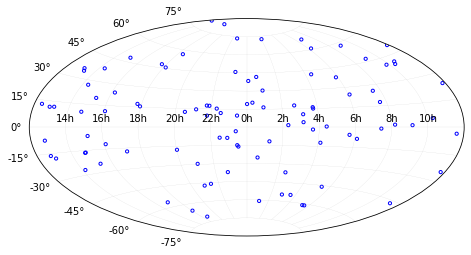

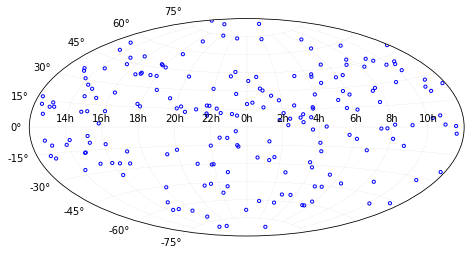

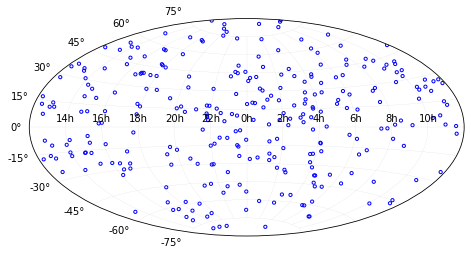

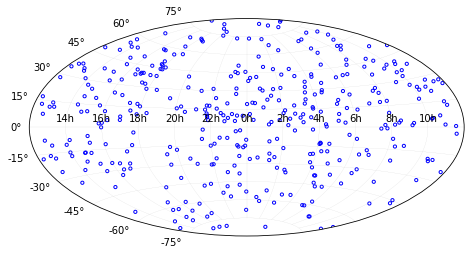

In [5]:
sky_dist_plot(apm_tab[:100], "../plot/sky-plot-1a.eps")
sky_dist_plot(apm_tab[:200], "../plot/sky-plot-1b.eps")
sky_dist_plot(apm_tab[:300], "../plot/sky-plot-1c.eps")
sky_dist_plot(apm_tab[:400], "../plot/sky-plot-1d.eps")

# List2

In [6]:
from astropy.table import vstack

In [7]:
N = 25
tab1 = vstack((apm_tab1[:N], apm_tab2[:N], apm_tab3[:N], apm_tab4[:N]))

N = 50
tab2 = vstack((apm_tab1[:N], apm_tab2[:N], apm_tab3[:N], apm_tab4[:N]))

N = 75
tab3 = vstack((apm_tab1[:N], apm_tab2[:N], apm_tab3[:N], apm_tab4[:N]))

N = 100
tab4 = vstack((apm_tab1[:N], apm_tab2[:N], apm_tab3[:N], apm_tab4[:N]))

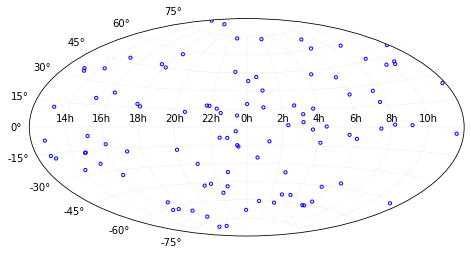

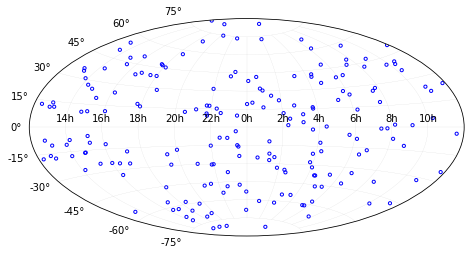

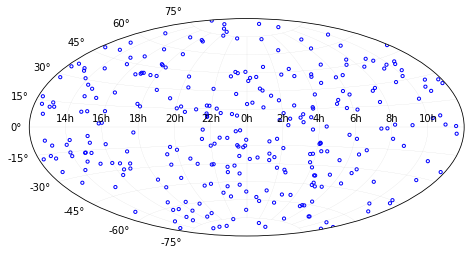

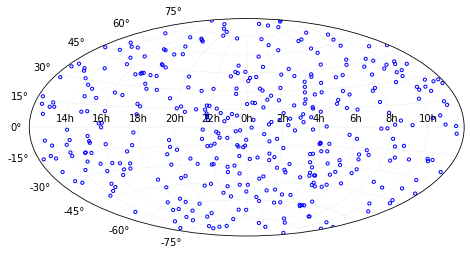

In [8]:
sky_dist_plot(tab1, "../plot/sky-plot-2a.eps")
sky_dist_plot(tab2, "../plot/sky-plot-2b.eps")
sky_dist_plot(tab3, "../plot/sky-plot-2c.eps")
sky_dist_plot(tab4, "../plot/sky-plot-2d.eps")